In [21]:
from IPython.display import Math
formulas = r'''
P(y=1|x,\mathbf{w}) = \sigma (\mathbf{w}^Tx) \qquad -\infty <\mathbf{w}^Tx < \infty  \qquad, 0\leq \sigma (\mathbf{w}^Tx) \leq 1\\
P(y=0|x,\mathbf{w}) = 1 - \sigma (\mathbf{w}^Tx)    \\
\sigma (z) = \frac{1}{1 + e^{-z}} \qquad  \\
\text {based on maximum likelyhood theory} \qquad \mathbf{\hat{w}} = \underset{w}{\arg\max} \hspace{0.2cm} \log \prod_{i=1}^{n} P(y^{(i)}|x^{(i)},\mathbf{w}) \\
P(y^{(i)}|x^{(i)},\mathbf{w})=\sigma (\mathbf{w}^Tx^{(i)})^{y^{(i)}} (1 - \sigma (\mathbf{w}^T x^{(i)}))^{(1 - y^{(i)})}\\
J(w) =\log \prod _{i=1}^{n} P(y^{(i)}|x^{(i)}, \mathbf{w}) = \sum  _{i=1}^{n} \log P(y^{(i)}|x^{(i)}, \mathbf{w}) 
    = \sum_{i=1}^{n}[y^{(i)}\log ( \sigma (\mathbf{w} ^T x^{(i)})) + 
    (1-y^{(i)})\log (1 - \sigma (\mathbf{w} ^ T x^{(i)}))] \\
\text {named cross entropy loss function} \\
\nabla _w J(w) = \sum_{i=1}^{n} (\sigma (\mathbf{w}^Tx^{(i)}) - y^{(i)})x^{(i)} \qquad \text{logestic regression formula (classification 0,1)}\\
\nabla _w J(w) = \sum_{i=1}^{n} (\mathbf{w}^Tx^{(i)} - y^{(i)})x^{(i)} \qquad \text{similar to linear regression formula (regression)} \\
\text{no way to solve closed form but because the secon derivative of loss function is: } \\
    \frac{y}{\sigma ^2} + \frac{1-y}{(1-\sigma )^2}
\text{always>0 and so its convex, hence the algorithm gradient descent convergea to the global optimum}
'''
Math(formulas)

<IPython.core.display.Math object>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
class binary_logestic_regression():
    def __init__(self, epoch=1000, etha=0.01, Precision_treshold = 0.90, recall_treshold=0.90, NPV_treshold = 0.90 ,F1_treshold = 0.80):
        self.epoch = epoch
        self.etha = etha # learning rate
        self.w = None
        self.accuracy = 0
        self.loss_hist =[]
        
        self.TP = None
        self.TN = None
        self.FP = None
        self.FN = None
        self.Precision_treshold = Precision_treshold
        self.NPV_treshold = NPV_treshold
        self.F1_treshold = F1_treshold
        self.Recall_treshold = recall_treshold        
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def predict_train(self, w, x):
        return(self.sigmoid(  x @ w ))
    
    def loss (self, w, x, y):
        p = self.predict_train(w, x) #p: probability
        loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p)) #loss is average
        return loss

    def gradient (self, w, x, y):
        p = self.predict_train(w, x) #p: probability
        errors = p - y
        gradient = x.T @ errors / len(y)
        return gradient 
    
    def fit(self, x, y):
        n, m = x.shape #samples, features
        self.w = np.zeros(m+1)
        x = np.c_[np.ones(n), x]
        for ep in range(self.epoch):
            grad = self.gradient(self.w, x, y)
            self.w -= self.etha * grad
            self.loss_hist.append(self.loss(self.w, x, y))

    def predict_val (self, y):
        return np.where(y>0.5 , 1 , 0)
    
    def metric(self, y_hat, y):
        self.TP = np.sum((y == 1) & (y_hat == 1))  # True Positive
        self.TN = np.sum((y == 0) & (y_hat == 0))  # True Negative
        self.FP = np.sum((y == 0) & (y_hat == 1))  # False Positive
        self.FN = np.sum((y == 1) & (y_hat == 0))  # False Negative

        cm = confusion_matrix(y, y_hat)
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Malignant', 'Predicted Benign'],
                    yticklabels=['Actual Malignant', 'Actual Benign'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')
        plt.show()
    
    def Accuracy_t (self):
        return (self.TP + self.TN) / (self.TP + self.TN + self.FP + self.FN)
    
    def Precision (self):
        return self.TP / (self.TP + self.FP) if (self.TP + self.FP) > 0 else 0
    
    def Recall (self):
        return self.TP / (self.TP + self.FN) if (self.TP + self.FN) > 0 else 0
    
    def F1_score(self):
        return  2 * (self.Precision() * self.Recall()) / (self.Precision() + self.Recall()) if (self.Precision() + self.Recall()) > 0 else 0
    
    def Specificity (self):
        return self.TN / (self.TN + self.FP) if (self.TN + self.FP) > 0 else 0
    
    def NPV (self):
        return self.TN / (self.TN + self.FN) if (self.TN + self.FN) > 0 else 0
    
    def show_metrics(self):
        print (f'''accuracy:\t{self.Accuracy_t()}\nPrecision:\t{self.Precision()}\nRecall:\t\t{self.Recall()}\nF1_score:\t{self.F1_score()}\nspecificity:\t{self.Specificity()}\nNPV:\t\t{self.NPV()}''')
        print('Based on metric results')
        if self.Precision() < self.Precision_treshold or self.Recall() < self.Recall_treshold :
            if self.Precision() < self.Precision_treshold  :
                print ('When the model detect a case as malignant')
            elif self.NPV() < self.NPV_treshold:
                print ('When the model detect a case as benign')
            print('It is recommended to redo examnations')
        if self.F1_score() < self.F1_treshold:
            print('Redesign your model')
        print(f'TP: {mymodel.TP}\tTN: {mymodel.TN}\tFP: {mymodel.FP}\tFN: {mymodel.FN}')

In [24]:
data = load_breast_cancer()
x = data.data
# x = data.data[:, [2, 4]]
y = data.target  # labels (0: malignant, 1: benign)
features = data.feature_names
# y values are ok for logestic regression algorithm

In [25]:
# import pandas as pd
# df = pd.DataFrame(x, columns=features)
# df.describe

In [26]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

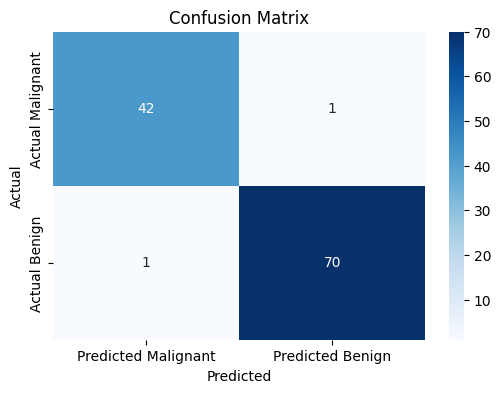

accuracy:	0.9824561403508771
Precision:	0.9859154929577465
Recall:		0.9859154929577465
F1_score:	0.9859154929577465
specificity:	0.9767441860465116
NPV:		0.9767441860465116
Based on metric results
TP: 70	TN: 42	FP: 1	FN: 1


In [32]:
mymodel = binary_logestic_regression()
mymodel.fit(x_train_scaled, y_train)
x_test_scaled_ = np.c_[np.ones(x_test_scaled.shape[0]), x_test_scaled]
y_hat_test = mymodel.predict_val(mymodel.predict_train(mymodel.w,  x_test_scaled_))
mymodel.metric(y_hat_test, y_test)
mymodel.show_metrics()

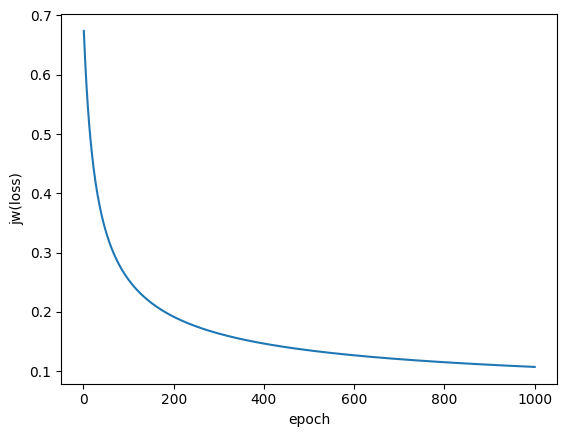

In [28]:
plt.plot(range(1,mymodel.epoch+1), mymodel.loss_hist)
plt.xlabel('epoch')
plt.ylabel('jw(loss)')
plt.show()